In [ ]:
## import urllib.request 
from urllib import parse 
import json 
import re
import os
import pandas as pd
# import chart_studio.plotly as py
import numpy as np
from pandas import DataFrame
import math
import datetime
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

mykey=u'51cffc64fd38c249e18e2a8265ad06f9'

#### 1. 完整读入一个月的数据，并按照日期进行储存方便操作

In [120]:
FilePath='E:/WorkSpace/py/Highway_analysis/data/trans/2'
record=pd.DataFrame([])
for root, dirs, files in os.walk(FilePath):
    for file in files:
        df=pd.read_csv(os.path.join(root, file),encoding='utf-8')
        record=record.append(df)

In [3]:
FilePath='data/trans/bydate/'
record=pd.DataFrame([])
for root, dirs, files in os.walk(FilePath):
    for file in tqdm(files):
        df=pd.read_csv(os.path.join(root, file),encoding='utf-8')
        record=record.append(df)
len(record)

100%|██████████| 30/30 [01:45<00:00,  3.50s/it]


14338225

In [61]:
df

,lookup.c_card_license,lookup.c_ex_license,lookup.c_ex_vehicle_class,lookup.c_ex_vehicle_type,lookup.n_en_date,lookup.n_en_time,lookup.n_ex_date,lookup.n_ex_time,lookup.n_en_station_id,lookup.n_ex_lane_id,lookup.n_trade_speed,lookup.d_fee_length,lookup.row_number_window_0
0,浙C8PJ23_0,浙C8PJ23_0,1,1,20200626,93309,20200626,95806,1135,114174,15,35,22800000
1,浙J58857_1,浙J58857_1,6,1,20200626,65218,20200626,95757,1237,113108,18,230,22800001
2,浙G698QC_0,浙G698QC_0,1,1,20200626,92643,20200626,95732,1135,115506,9,47,22800002
3,浙G895NX_0,浙G895NX_0,1,1,20200626,93638,20200626,95720,1749,112508,24,23,22800003
4,沪DB8879_1,沪DB8879_1,3,1,20200626,55228,20200626,95754,1921,115506,17,211,22800004
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,皖SWB218_0,皖SWB218_0,1,1,20200626,101544,20200626,104244,1044,104710,0,0,22899994
99995,苏N657C3_0,苏N657C3_0,1,1,20200626,91947,20200626,104315,1015,104710,9,100,22899995
99996,浙A1R6K9_0,浙A1R6K9_0,1,1,20200626,102548,20200626,104050,3237,324302,36,21,22899996
99997,浙BD87933_4,浙BD87933_4,1,1,20200626,101726,20200626,104334,1044,104710,8,39,22899997


In [3]:
record=record.drop(record[record['lookup.n_en_date']>=20200701].index)
record=record.drop(record[record['lookup.n_en_date']<20200601].index)
record=record.drop(record[record['lookup.n_trade_speed']>50].index)
record['lookup.d_fee_length']=record['lookup.d_fee_length'].replace(0,np.nan)
record=record.dropna()

,lookup.c_card_license,lookup.c_ex_license,lookup.c_ex_vehicle_class,lookup.c_ex_vehicle_type,lookup.n_en_date,lookup.n_en_time,lookup.n_ex_date,lookup.n_ex_time,lookup.n_en_station_id,lookup.n_ex_lane_id,lookup.n_trade_speed,lookup.d_fee_length,lookup.row_number_window_0
0,浙EKF712_0,浙EKF712_0,1,1,20200615,111316,20200615,111827,3229,323174,1,4.0,12900000
2,浙A3AP93_0,浙A3AP93_0,1,1,20200615,145916,20200615,152109,3243,323570,19,32.0,12900002
3,苏BA1912_1,苏BA1912_1,2,1,20200615,140423,20200615,144939,3233,323708,5,45.0,12900003
8,浙A3HK45_0,浙A3HK45_0,1,1,20200615,135527,20200615,140440,1023,102782,0,5.0,12900008
9,浙A29A7V_0,浙A29A7V_0,1,1,20200615,150559,20200615,163532,2819,102918,0,125.0,12900009
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25104,沪C120QR_0,沪C120QR_0,1,1,20200630,151821,20200630,155625,1135,112570,20,65.0,26725104
25106,浙GH3377_0,浙GH3377_0,1,1,20200630,155003,20200630,155618,1123,112570,13,9.0,26725106
25107,浙GSV399_0,浙GSV399_0,1,1,20200630,155015,20200630,155611,1127,112570,16,7.0,26725107
25109,浙GDL878_0,浙GDL878_0,1,1,20200630,145946,20200630,155601,2635,112570,0,84.0,26725109


In [4]:
dateg=record.groupby('lookup.n_en_date')

In [119]:
for date in range(20200616,20200631):
    filename='data/trans/bydate/2/'+str(date)+'.csv'
    df=dateg.get_group(date)
    df['lookup.n_en_date']=date
    df.to_csv(filename,encoding='utf_8_sig')

### 2. OD矩阵构建

In [3]:
tolldata=pd.read_excel('data/收费站info.xlsx')
tolldata.columns=['idx','id','name','lon','lat']
tollList=tolldata['id'].tolist()
tollList=[str(i) for i in tollList]
mapping={}
for i in range(0,457):
    mapping[str(tolldata['id'][i])]=i
rmapping=dict(map(reversed, mapping.items())) 

def tollmapping(x):
    if str(x) in tollList:
        return mapping[str(x)]
    else:
        return np.nan

In [118]:
rmapping[0]

'1255'

In [15]:
def Floyd(m):
    ret=m.copy()
    for k in range(len(ret)):        
        for i in range(len(ret)):     
            for j in range(len(ret)): 
                if ret[i][j] > ret[i][k] + ret[k][j]:
                    ret[i][j] = ret[i][k] + ret[k][j]
    return ret

In [16]:
A=np.load('data/conn/A.npy') #连通矩阵
# dist=A.copy()
# np.place(dist,dist==0,np.inf)
# row, col = np.diag_indices_from(dist)
# dist[row,col] = 0
dist=np.load('data/conn/dist.npy')
dists=Floyd(dist)

In [22]:
FilePath='data/trans/bydate/'
savePath='data/trans/cleaned/'
for root, dirs, files in os.walk(FilePath):   
    for file in tqdm(files):   
        sample=pd.read_csv(os.path.join(root, file),encoding='utf-8')
        sample=sample.drop(sample[sample['lookup.n_en_date']>=20200701].index)
        sample=sample.drop(sample[sample['lookup.n_en_date']<20200601].index)
        sample=sample.drop(sample[sample['lookup.n_trade_speed']>50].index)
        sample['lookup.d_fee_length']=sample['lookup.d_fee_length'].replace(0,np.nan)
        sample=sample.dropna()
        
        TransInfo=sample.loc[:,['lookup.c_card_license','lookup.n_en_date','lookup.n_en_time','lookup.n_ex_date','lookup.n_ex_time','lookup.n_en_station_id','lookup.n_ex_lane_id']]
        TransInfo.columns=['id','endate','entime','exdate','extime','enstation','exstation']
        TransInfo['exstation']//=100

        TransInfo['enTime']=(TransInfo['endate'].apply(lambda x : str(x))+' '+TransInfo['entime'].apply(lambda x : "{:0>6d}".format(x))).apply(lambda x : pd.to_datetime(x))
        TransInfo['exTime']=(TransInfo['exdate'].apply(lambda x : str(x))+' '+TransInfo['extime'].apply(lambda x : "{:0>6d}".format(x))).apply(lambda x : pd.to_datetime(x))
        TransInfo['enpoint']=TransInfo['enstation'].apply(lambda x : tollmapping(x))
        TransInfo['expoint']=TransInfo['exstation'].apply(lambda x : tollmapping(x))
        TransInfo['period']=TransInfo['exTime']-TransInfo['enTime']

        TransInfo=TransInfo.dropna()

        TransInfo=TransInfo.loc[:,['id','enTime','enpoint','exTime','expoint','period']]
        TransInfo=TransInfo.drop(TransInfo[TransInfo['period']<datetime.timedelta(days=0)].index)
        
        TransInfo['period']=TransInfo['period'].apply(lambda x: x.total_seconds()/60/60)
        TransInfo['mileage']=TransInfo.apply(lambda x: dists[int(x['enpoint']),int(x['expoint'])],axis=1)
        TransInfo['avgspeed']=TransInfo.apply(lambda x: float(format(x['mileage']/x['period'], '.2f')),axis=1)
        
        TransInfo=TransInfo.drop(TransInfo[TransInfo['avgspeed']>120].index)
        TransInfo=TransInfo.drop(TransInfo[TransInfo['avgspeed']<50].index)
        TransInfo.to_csv(savePath+file,encoding='utf_8_sig')

100%|██████████| 30/30 [40:53<00:00, 81.80s/it]


In [9]:
len(raw_data)

8311124

In [3]:
raw_data=pd.DataFrame([])
FilePath='data/trans/cleaned/train/'
for root, dirs, files in os.walk(FilePath):   
    for file in tqdm(files):
        if(file=='.DS_Store'):
            continue
        df=pd.read_csv(FilePath+file)
        raw_data=raw_data.append(df)

100%|██████████| 24/24 [00:39<00:00,  1.65s/it]


,Unnamed: 0,id,enTime,enpoint,exTime,expoint,period,mileage,avgspeed
0,15,皖DAB085_0,2020-06-04 10:08:58,169.0,2020-06-04 10:46:02,229.0,0.617778,57.077391,92.39
1,16,浙E9T971_0,2020-06-04 09:07:50,231.0,2020-06-04 09:20:32,227.0,0.211667,16.720667,79.00
2,17,浙E380Z9_0,2020-06-04 09:07:02,165.0,2020-06-04 09:20:36,227.0,0.226111,17.955843,79.41
3,18,浙EE935C_0,2020-06-04 11:55:50,169.0,2020-06-04 12:33:48,227.0,0.632778,47.837137,75.60
4,20,浙E5086F_0,2020-06-04 12:20:17,231.0,2020-06-04 12:34:22,227.0,0.234722,16.720667,71.24
...,...,...,...,...,...,...,...,...,...
348227,454410,浙G416GG_0,2020-06-21 22:54:53,430.0,2020-06-22 00:03:50,19.0,1.149167,102.536349,89.23
348228,454411,浙H81R97_0,2020-06-21 23:17:38,15.0,2020-06-22 00:03:43,248.0,0.768056,47.172921,61.42
348229,454412,浙GT5092_0,2020-06-21 23:50:04,401.0,2020-06-22 00:01:23,19.0,0.188611,15.021790,79.64
348230,454414,浙DJ5750_1,2020-06-21 23:06:29,247.0,2020-06-22 00:01:34,398.0,0.918056,64.662205,70.43


#### 2.1错误数据剔除

**根据数据范围筛除**

In [4]:
sample=sample.drop(sample[sample['lookup.n_en_date']>=20200701].index)
sample=sample.drop(sample[sample['lookup.n_en_date']<20200601].index)
sample=sample.drop(sample[sample['lookup.n_trade_speed']>50].index)
sample['lookup.d_fee_length']=sample['lookup.d_fee_length'].replace(0,np.nan)
sample=sample.dropna()

In [5]:
# df['total'] = df[['data1','data2']].apply(lambda x : x.sum(), axis = 1)

In [13]:
TransInfo=sample.loc[:,['lookup.c_card_license','lookup.n_en_date','lookup.n_en_time','lookup.n_ex_date','lookup.n_ex_time','lookup.n_en_station_id','lookup.n_ex_lane_id']]
TransInfo.columns=['id','endate','entime','exdate','extime','enstation','exstation']
TransInfo['exstation']//=100

TransInfo['enTime']=(TransInfo['endate'].apply(lambda x : str(x))+' '+TransInfo['entime'].apply(lambda x : "{:0>6d}".format(x))).apply(lambda x : pd.to_datetime(x))
TransInfo['exTime']=(TransInfo['exdate'].apply(lambda x : str(x))+' '+TransInfo['extime'].apply(lambda x : "{:0>6d}".format(x))).apply(lambda x : pd.to_datetime(x))
TransInfo['enpoint']=TransInfo['enstation'].apply(lambda x : tollmapping(x))
TransInfo['expoint']=TransInfo['exstation'].apply(lambda x : tollmapping(x))
TransInfo['period']=TransInfo['exTime']-TransInfo['enTime']

TransInfo=TransInfo.dropna()

TransInfo=TransInfo.loc[:,['id','enTime','enpoint','exTime','expoint','period']]
# TransInfo=TransInfo.applymap(str)
TransInfo.head(5)

,id,enTime,enpoint,exTime,expoint,period
0,浙EJ659F_0,2020-06-01 14:44:01,228.0,2020-06-01 16:05:00,229.0,01:20:59
1,浙F3N115_0,2020-06-01 14:25:11,336.0,2020-06-01 15:20:36,229.0,00:55:25
2,浙AGG346_0,2020-06-01 12:53:00,389.0,2020-06-01 14:33:40,229.0,01:40:40
4,苏EBD031_0,2020-06-01 14:40:22,294.0,2020-06-01 15:14:01,229.0,00:33:39
6,皖DP999S_0,2020-06-01 06:56:47,336.0,2020-06-01 09:09:06,229.0,02:12:19


**根据近似通行时间筛除**

In [14]:
TransInfo=TransInfo.drop(TransInfo[TransInfo['period']<datetime.timedelta(days=0)].index) #时序错误

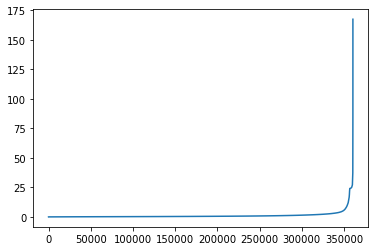

In [15]:
TransInfo['period']=TransInfo['period'].apply(lambda x: x.total_seconds()/60/60)
TransInfo['period'].sort_values().reset_index(drop=True).plot()

In [9]:
def Floyd(m):
    ret=m.copy()
    for k in range(len(ret)):        
        for i in range(len(ret)):     
            for j in range(len(ret)): 
                if ret[i][j] > ret[i][k] + ret[k][j]:
                    ret[i][j] = ret[i][k] + ret[k][j]
    return ret

In [10]:
A=np.load('data/conn/A.npy') #连通矩阵
# dist=A.copy()
# np.place(dist,dist==0,np.inf)
# row, col = np.diag_indices_from(dist)
# dist[row,col] = 0
dist=np.load('data/conn/dist.npy')
dists=Floyd(dist)


In [233]:
inflist

[255, 257, 426, 428, 431, 446, 454, 455, 456]

In [78]:
TransInfo['mileage']=TransInfo.apply(lambda x: dists[int(x['enpoint']),int(x['expoint'])],axis=1)
TransInfo['avgspeed']=TransInfo.apply(lambda x: float(format(x['mileage']/x['period'], '.2f')),axis=1)

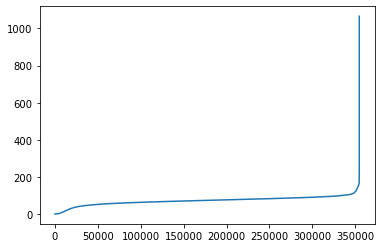

In [61]:
TransInfo['avgspeed'].sort_values().reset_index(drop=True).plot()

In [86]:
# 428-'1182' 貌似在连通图里孤立但是在这有出现，可以考虑怎么加入到连通图内，后续需要考虑的小点，sample比例1/60 不算低
TransInfo[TransInfo['avgspeed']==np.inf]

,id,enTime,enpoint,exTime,expoint,period,mileage,avgspeed
6560,浙A631RH_0,2020-06-01 16:29:53,428.0,2020-06-01 16:58:31,207.0,0.477222,inf,inf
6616,浙J02P82_0,2020-06-01 14:40:33,428.0,2020-06-01 16:50:53,305.0,2.172222,inf,inf
6700,浙B7V001_0,2020-06-01 15:32:06,428.0,2020-06-01 16:52:30,452.0,1.340000,inf,inf
6761,浙D918LT_0,2020-06-01 16:40:10,428.0,2020-06-01 16:59:20,263.0,0.319444,inf,inf
6762,浙DB65D0_0,2020-06-01 16:03:18,428.0,2020-06-01 17:00:52,202.0,0.959444,inf,inf
...,...,...,...,...,...,...,...,...
390120,浙B13UT6_0,2020-06-01 23:35:06,428.0,2020-06-02 00:53:06,53.0,1.300000,inf,inf
390235,浙J1C1A6_0,2020-06-01 22:56:10,428.0,2020-06-02 00:51:08,198.0,1.916111,inf,inf
390342,浙B5G68P_0,2020-06-01 23:55:12,428.0,2020-06-02 01:38:32,7.0,1.722222,inf,inf
390656,浙JB191F_0,2020-06-01 23:34:44,428.0,2020-06-02 02:28:35,182.0,2.897500,inf,inf


In [85]:
rmapping[428]

'1182'

In [94]:
TransInfo=TransInfo.drop(TransInfo[TransInfo['avgspeed']>200].index) #速度明显错误
#之后再细化，考虑到近似行驶距离变小会导致计算得到速度会偏小，这里先认为根据曲线选取一般情况，50~120

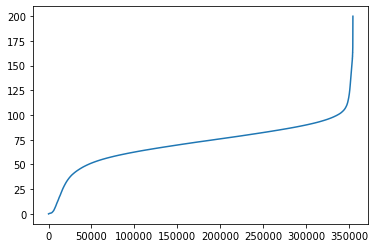

In [97]:
TransInfo['avgspeed'].sort_values().reset_index(drop=True).plot()

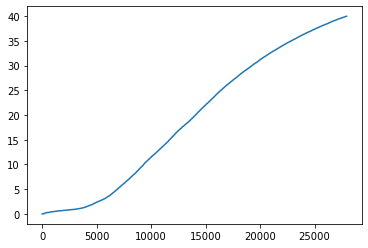

In [92]:
# TransInfo=TransInfo.drop(TransInfo[TransInfo['avgspeed']<datetime.timedelta(days=0)].index) #时序错误
TransInfo[TransInfo['avgspeed']<40]['avgspeed'].sort_values().reset_index(drop=True).plot()

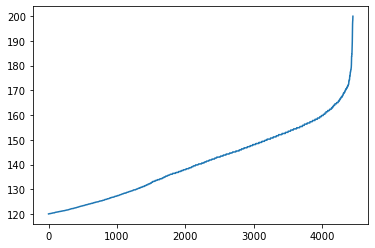

In [96]:
TransInfo[TransInfo['avgspeed']>120]['avgspeed'].sort_values().reset_index(drop=True).plot()

In [98]:
TransInfo=TransInfo.drop(TransInfo[TransInfo['avgspeed']>120].index)
TransInfo=TransInfo.drop(TransInfo[TransInfo['avgspeed']<50].index)
TransInfo

,id,enTime,enpoint,exTime,expoint,period,mileage,avgspeed
1,浙F3N115_0,2020-06-01 14:25:11,336.0,2020-06-01 15:20:36,229.0,0.923611,61.996233,67.12
2,浙AGG346_0,2020-06-01 12:53:00,389.0,2020-06-01 14:33:40,229.0,1.677778,143.360140,85.45
4,苏EBD031_0,2020-06-01 14:40:22,294.0,2020-06-01 15:14:01,229.0,0.560833,42.839298,76.39
7,浙02611警_3,2020-06-01 03:07:25,231.0,2020-06-01 03:24:21,227.0,0.282222,16.720667,59.25
9,浙A6C0Q8_0,2020-06-01 14:45:38,381.0,2020-06-01 15:24:57,233.0,0.655278,46.681806,71.24
...,...,...,...,...,...,...,...,...
391543,浙E812C7_0,2020-06-01 20:31:18,7.0,2020-06-02 00:00:08,230.0,3.480556,284.298211,81.68
391547,苏CJH883_1,2020-06-01 22:34:37,21.0,2020-06-02 00:16:05,233.0,1.691111,110.636639,65.42
391548,豫HL9539_1,2020-06-01 21:04:42,17.0,2020-06-02 00:14:32,233.0,3.163889,230.398226,72.82
391571,鲁RB5968_1,2020-06-01 22:37:49,4.0,2020-06-02 03:24:26,233.0,4.776944,298.730399,62.54


#### 2.2 闭包时间长度确定

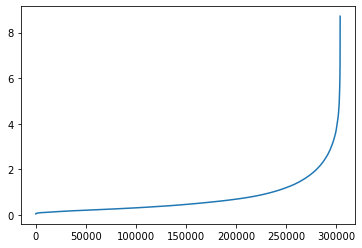

In [102]:
TransInfo['period'].sort_values().reset_index(drop=True).plot()

In [104]:
groups=TransInfo.groupby(pd.Grouper(key='enTime', freq='2H'))
# 按照enTime 来进行划分，时间间隔未定，进行判断，根据上图，90%+的数据应当都落在<2H

In [44]:
raw_data

,Unnamed: 0,id,enTime,enpoint,exTime,expoint,period,mileage,avgspeed
0,15,皖DAB085_0,2020-06-04 10:08:58,169.0,2020-06-04 10:46:02,229.0,0.617778,57.077391,92.39
1,16,浙E9T971_0,2020-06-04 09:07:50,231.0,2020-06-04 09:20:32,227.0,0.211667,16.720667,79.00
2,17,浙E380Z9_0,2020-06-04 09:07:02,165.0,2020-06-04 09:20:36,227.0,0.226111,17.955843,79.41
3,18,浙EE935C_0,2020-06-04 11:55:50,169.0,2020-06-04 12:33:48,227.0,0.632778,47.837137,75.60
4,20,浙E5086F_0,2020-06-04 12:20:17,231.0,2020-06-04 12:34:22,227.0,0.234722,16.720667,71.24
...,...,...,...,...,...,...,...,...,...
348227,454410,浙G416GG_0,2020-06-21 22:54:53,430.0,2020-06-22 00:03:50,19.0,1.149167,102.536349,89.23
348228,454411,浙H81R97_0,2020-06-21 23:17:38,15.0,2020-06-22 00:03:43,248.0,0.768056,47.172921,61.42
348229,454412,浙GT5092_0,2020-06-21 23:50:04,401.0,2020-06-22 00:01:23,19.0,0.188611,15.021790,79.64
348230,454414,浙DJ5750_1,2020-06-21 23:06:29,247.0,2020-06-22 00:01:34,398.0,0.918056,64.662205,70.43


In [50]:
raw_data

,Unnamed: 0,id,enTime,enpoint,exTime,expoint,period,mileage,avgspeed
0,15,皖DAB085_0,2020-06-04 10:08:58,169.0,2020-06-04 10:46:02,229.0,0.617778,57.077391,92.39
1,16,浙E9T971_0,2020-06-04 09:07:50,231.0,2020-06-04 09:20:32,227.0,0.211667,16.720667,79.00
2,17,浙E380Z9_0,2020-06-04 09:07:02,165.0,2020-06-04 09:20:36,227.0,0.226111,17.955843,79.41
3,18,浙EE935C_0,2020-06-04 11:55:50,169.0,2020-06-04 12:33:48,227.0,0.632778,47.837137,75.60
4,20,浙E5086F_0,2020-06-04 12:20:17,231.0,2020-06-04 12:34:22,227.0,0.234722,16.720667,71.24
...,...,...,...,...,...,...,...,...,...
348227,454410,浙G416GG_0,2020-06-21 22:54:53,430.0,2020-06-22 00:03:50,19.0,1.149167,102.536349,89.23
348228,454411,浙H81R97_0,2020-06-21 23:17:38,15.0,2020-06-22 00:03:43,248.0,0.768056,47.172921,61.42
348229,454412,浙GT5092_0,2020-06-21 23:50:04,401.0,2020-06-22 00:01:23,19.0,0.188611,15.021790,79.64
348230,454414,浙DJ5750_1,2020-06-21 23:06:29,247.0,2020-06-22 00:01:34,398.0,0.918056,64.662205,70.43


In [48]:
sample=raw_data
sample=sample.loc[:,['id','enTime','enpoint','expoint','period']]
sample['enTime']=sample['enTime'].apply(lambda x:'2020-01-01 '+x[-9:])
sample['enTime']=pd.to_datetime(sample['enTime'])
groups=sample.groupby(pd.Grouper(key='enTime', freq='2H'))

In [58]:
for idx,g in groups:
    g.to_csv('data/trans/byhour/'+str(idx)[-8:]+'.csv')

2020-01-01 00:00:00 126123
2020-01-01 02:00:00 100665
2020-01-01 04:00:00 254413
2020-01-01 06:00:00 851339
2020-01-01 08:00:00 1238936
2020-01-01 10:00:00 981940
2020-01-01 12:00:00 1074541
2020-01-01 14:00:00 1124933
2020-01-01 16:00:00 1128009
2020-01-01 18:00:00 753880
2020-01-01 20:00:00 478667
2020-01-01 22:00:00 197678
